Simulation of pricing of coupon-bearing bond using CIR

In [36]:
import numpy as np
import pandas as pd
import Easy_Risk_Kit as erk 
%load_ext autoreload
%autoreload 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
erk.bond_price(5, 100, 0.05, 12, 0.03)

0    109.275393
dtype: float64

In [4]:
rates, zc_prices=erk.cir(10, 500, b=0.03, r_0=0.03)

In [5]:
erk.bond_price(5, 100, 0.05, 12, rates.iloc[0][[1,2,3 ]])

1    109.275393
2    109.275393
3    109.275393
dtype: float64

In [6]:
erk.bond_price(5, 100, 0.05, 12, rates.iloc[1][[1,2,3 ]])

1    108.761673
2    109.578349
3    107.665421
dtype: float64

In [74]:
rates[[1,2,3 ]].head()

,1,2,3
0,0.030000,0.030000,0.030000
1,0.030712,0.031113,0.029512
2,0.031145,0.035134,0.029947
3,0.032501,0.036217,0.031239
4,0.035036,0.035800,0.028942


In [76]:
#At time 0 they have the same interest rate so they had the same price unlike at time t. But tie t=1, they start diverging

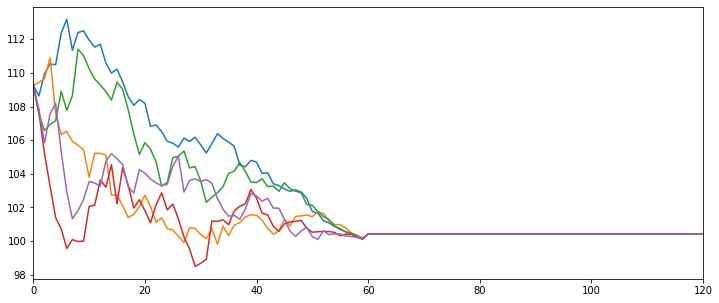

In [8]:
erk.bond_price(5, 100, 0.05, 12, rates[[1,2,3,4,5]]).plot(legend=False, figsize=(12,5))

In [19]:
# This is a 5 year bond

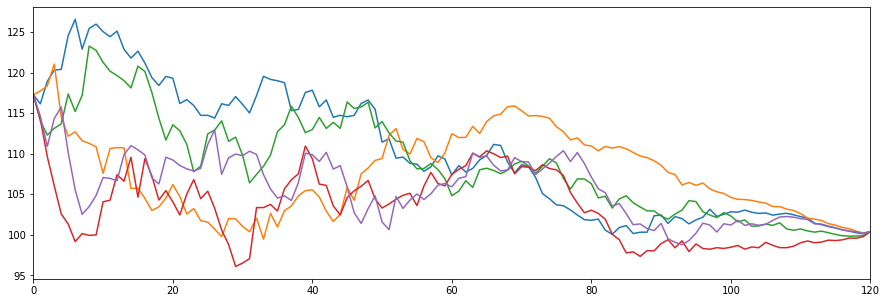

In [9]:
erk.bond_price(10, 100, 0.05, 12, rates[[1,2,3,4,5 ]]).plot(legend=False, figsize=(15,5))

In [10]:
prices=erk.bond_price(10, 100, 0.05, 12, rates[[1,2,3,4,5]])
prices

,1,2,3,4,5
0,117.26,117.26,117.26,117.26,117.26
1,116.149,117.722,114.056,114.251,114.635
2,118.907,118.353,112.294,109.663,110.895
3,120.293,121.041,113.126,106.046,114.336
4,120.391,114.542,113.674,102.586,115.745
...,...,...,...,...,...
116,100.623,100.912,99.8957,99.3884,100.603
117,100.457,100.761,99.8413,99.6116,100.487
118,100.259,100.456,99.8635,99.5905,100.373
119,100.127,100.212,99.8874,99.7945,100.223


In [23]:
# we want to generate random bond prices to get returns and then constrcut the return of a potfolio that consist of a mix
#of stocks and bonds

In [11]:
br=prices.pct_change().dropna()
erk.annualized_rets(br, 12)


1   -0.015387
2   -0.015387
3   -0.015387
4   -0.015387
5   -0.015387
dtype: float64

In [13]:
p=erk.bond_price(10,100,0.05,12, rates[[1,2,3,4]])
btr=erk.bond_total_return(p, 100, 0.05, 12)
erk.annualized_rets(btr,12)

1    0.030497
2    0.031511
3    0.031036
4    0.033452
dtype: float64

In [34]:
# value of intermediate payments are affected by interest rate which is more unceratin as we move in time

In [16]:
price_10=erk.bond_price(10, 100, 0.05, 12, rates)
price_10[[1,2,3,4]].tail()

,1,2,3,4
116,100.623,100.912,99.8957,99.3884
117,100.457,100.761,99.8413,99.6116
118,100.259,100.456,99.8635,99.5905
119,100.127,100.212,99.8874,99.7945
120,100.417,100.417,100.417,100.417


In [19]:
price_30=erk.bond_price(30, 100, 0.05, 12, rates)
price_30[[1,2,3]].tail()

,1,2,3
116,128.279,144.801,96.0742
117,127.484,151.055,92.2764
118,122.628,144.4,90.2251
119,122.018,140.393,84.6192
120,120.132,137.869,88.7959


In [39]:
#enormous variation in the price of the bond atthe end because they haven't yet converged 

In [20]:
price_30[[1,2,3]].head()

,1,2,3
0,139.532,139.532,139.532
1,136.876,141.015,131.526
2,144.503,142.993,127.33
3,148.673,150.795,129.577
4,149.294,133.395,131.163


In [21]:
rets_30=erk.bond_total_return(price_30, 100,0.05,12)
rets_10=erk.bond_total_return(price_10, 100,0.05,12)
rets_bonds=0.6*rets_10+0.4*rets_30


In [42]:
mean_rets_bonds=rets_bonds.mean(axis='columns')
erk.summary_stats(pd.DataFrame (mean_rets_bonds))

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-fisher Var(5%),Historic CVaR(5%),Sharpe Ratio,Max Drawdown
0,0.036132,0.003836,0.38153,3.820286,-0.00129,-0.000861,1.555576,0.0


In [54]:
price_eq=erk.gbm(n_years=10, n_scenarios=500, mu=0.07, sigma=0.15, prices=False)
price_eq.shape

(120, 500)

In [55]:
rets_eq=price_eq.pct_change().dropna()
rets_eq.shape

(119, 500)

In [53]:
rets_bonds.shape

(120, 500)

In [56]:
rets=0.7*rets_eq+ 0.3*rets_bonds
rets_mean=rets.mean(axis='columns')
erk.summary_stats(pd.DataFrame(rets_mean))

C:\Users\lenovo\Easy_Risk_Kit.py:142: RuntimeWarning: invalid value encountered in double_scalars
  return coumpounded_growth**(periods_per_year/n_periods)-1


,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-fisher Var(5%),Historic CVaR(5%),Sharpe Ratio,Max Drawdown
0,NaN,19.398438,0.094867,16.751897,8.757855,NaN,NaN,-59.782312
